# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

city_url = f"{url}&appid={weather_api_key}&q={city}&units=metric"

response = requests.get(city_url)

json_weather = response.json()

pp.pprint(json_weather)

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': -54.2811, 'lon': -36.5092},
 'dt': 1683501729,
 'id': 3426466,
 'main': {'feels_like': -3.47,
          'grnd_level': 995,
          'humidity': 88,
          'pressure': 1000,
          'sea_level': 1000,
          'temp': 1.83,
          'temp_max': 1.83,
          'temp_min': 1.83},
 'name': 'Grytviken',
 'snow': {'1h': 0.43},
 'sys': {'country': 'GS', 'sunrise': 1683453307, 'sunset': 1683485404},
 'timezone': -7200,
 'visibility': 3994,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 253, 'gust': 11.68, 'speed': 6.77}}
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | wailua homesteads
P

Processing Record 19 of Set 4 | prince rupert
Processing Record 20 of Set 4 | guntakal junction
Processing Record 21 of Set 4 | andergrove
Processing Record 22 of Set 4 | andkhoy
Processing Record 23 of Set 4 | bozhou
Processing Record 24 of Set 4 | la gi
Processing Record 25 of Set 4 | ceelbuur
Processing Record 26 of Set 4 | ulsteinvik
Processing Record 27 of Set 4 | gunjur
Processing Record 28 of Set 4 | pisco
Processing Record 29 of Set 4 | udachny
Processing Record 30 of Set 4 | belaya kholunitsa
Processing Record 31 of Set 4 | jamestown
Processing Record 32 of Set 4 | berezovyy
Processing Record 33 of Set 4 | baukau
Processing Record 34 of Set 4 | portland
Processing Record 35 of Set 4 | minab
Processing Record 36 of Set 4 | holbrook
Processing Record 37 of Set 4 | palpa
Processing Record 38 of Set 4 | kapsowar
City not found. Skipping...
Processing Record 39 of Set 4 | knyaze-volkonskoye
Processing Record 40 of Set 4 | st. john's
Processing Record 41 of Set 4 | kargasok
Processi

Processing Record 13 of Set 8 | nemuro
Processing Record 14 of Set 8 | kalispell
Processing Record 15 of Set 8 | radyvyliv
Processing Record 16 of Set 8 | prineville
Processing Record 17 of Set 8 | pruzhany
Processing Record 18 of Set 8 | nayoro
Processing Record 19 of Set 8 | happy valley-goose bay
Processing Record 20 of Set 8 | wilhelmshaven
Processing Record 21 of Set 8 | cole harbour
Processing Record 22 of Set 8 | revda
Processing Record 23 of Set 8 | seogwipo
City not found. Skipping...
Processing Record 24 of Set 8 | opelousas
Processing Record 25 of Set 8 | sanibel
Processing Record 26 of Set 8 | labuan bajo
Processing Record 27 of Set 8 | kirakira
Processing Record 28 of Set 8 | lensk
Processing Record 29 of Set 8 | vorkuta
Processing Record 30 of Set 8 | roma
Processing Record 31 of Set 8 | lihue
Processing Record 32 of Set 8 | inarajan village
Processing Record 33 of Set 8 | tandil
Processing Record 34 of Set 8 | lijiang
Processing Record 35 of Set 8 | leava
Processing Reco

Processing Record 5 of Set 12 | maroantsetra
Processing Record 6 of Set 12 | port hedland
Processing Record 7 of Set 12 | inongo
Processing Record 8 of Set 12 | ikovka
Processing Record 9 of Set 12 | howard springs
Processing Record 10 of Set 12 | zhaobaoshan
Processing Record 11 of Set 12 | khorixas
Processing Record 12 of Set 12 | bubaque
Processing Record 13 of Set 12 | gebeit
Processing Record 14 of Set 12 | bam
Processing Record 15 of Set 12 | grand baie
Processing Record 16 of Set 12 | vallet
Processing Record 17 of Set 12 | balakhta
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | ayr
Processing Record 20 of Set 12 | mamuju
Processing Record 21 of Set 12 | manaure
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | chetwayi
Processing Record 24 of Set 12 | sabang
Processing Record 25 of Set 12 | chernyshevskiy
Processing Record 26 of Set 12 | kittila
Processing Record 27 of Set 12 | mount isa
Processing Record 28 of Set 12 | ingeniero 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,268.16,80,94,1.10,RU,1683501747
1,georgetown,5.4112,100.3354,300.11,94,20,1.03,MY,1683501727
2,bethel,41.3712,-73.4140,294.24,51,91,1.51,US,1683501725
3,wailua homesteads,22.0669,-159.3780,300.39,66,20,7.20,US,1683501751
4,krasnyy chikoy,50.3643,108.7512,284.62,46,14,0.70,RU,1683502299


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,268.16,80,94,1.10,RU,1683501747
1,georgetown,5.4112,100.3354,300.11,94,20,1.03,MY,1683501727
2,bethel,41.3712,-73.4140,294.24,51,91,1.51,US,1683501725
3,wailua homesteads,22.0669,-159.3780,300.39,66,20,7.20,US,1683501751
4,krasnyy chikoy,50.3643,108.7512,284.62,46,14,0.70,RU,1683502299


In [8]:
#Convert the utc timestamp into a readable date
date_retrieval = datetime.utcfromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')
print(date_retrieval)

2023-05-07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

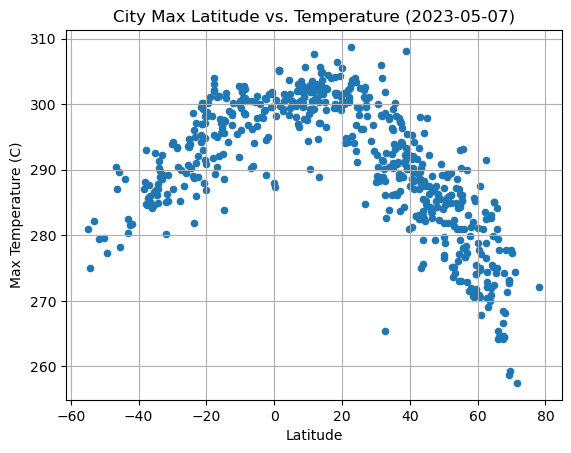

In [20]:
# Build scatter plot for latitude vs. temperature
lat_temp_overall = city_data_df.plot.scatter("Lat", "Max Temp", \
                                             title = f"City Max Latitude vs. Temperature ({date_retrieval})")

# Incorporate the other graph properties
lat_temp_overall.set_xlabel("Latitude")
lat_temp_overall.set_ylabel("Max Temperature (C)")
lat_temp_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

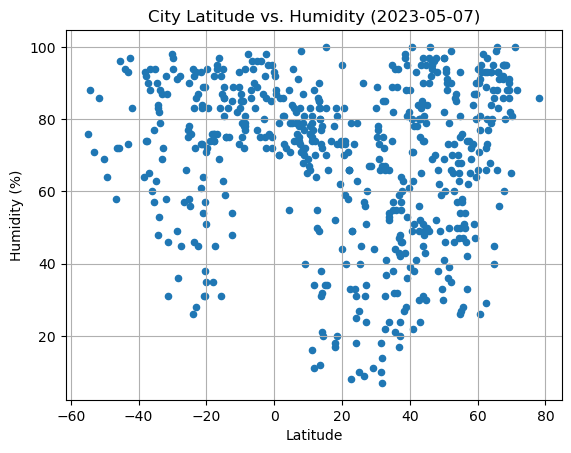

In [21]:
# Build the scatter plots for latitude vs. humidity
lat_humid_overall = city_data_df.plot.scatter("Lat", "Humidity", \
                                             title = f"City Latitude vs. Humidity ({date_retrieval})")

# Incorporate the other graph properties
lat_humid_overall.set_xlabel("Latitude")
lat_humid_overall.set_ylabel("Humidity (%)")
lat_humid_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

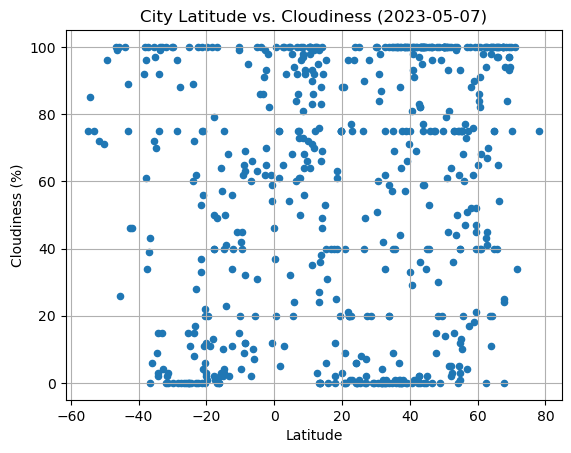

In [22]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloudiness_overall = city_data_df.plot.scatter("Lat", "Cloudiness", \
                                             title = f"City Latitude vs. Cloudiness ({date_retrieval})")

# Incorporate the other graph properties
lat_cloudiness_overall.set_xlabel("Latitude")
lat_cloudiness_overall.set_ylabel("Cloudiness (%)")
lat_cloudiness_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

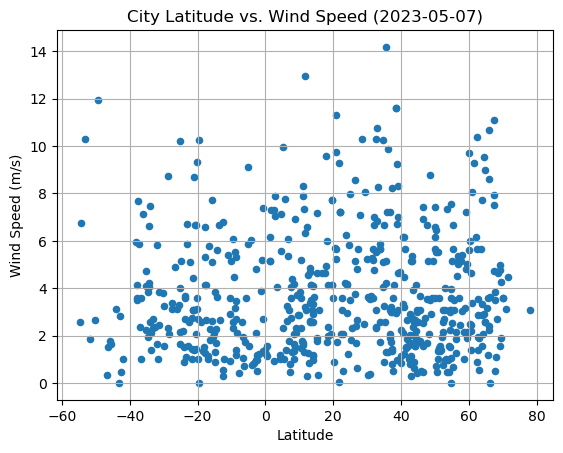

In [23]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_speed_overall = city_data_df.plot.scatter("Lat", "Wind Speed", \
                                             title = f"City Latitude vs. Wind Speed ({date_retrieval})")

# Incorporate the other graph properties
lat_wind_speed_overall.set_xlabel("Latitude")
lat_wind_speed_overall.set_ylabel("Wind Speed (m/s)")
lat_wind_speed_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,268.16,80,94,1.10,RU,1683501747
1,georgetown,5.4112,100.3354,300.11,94,20,1.03,MY,1683501727
2,bethel,41.3712,-73.4140,294.24,51,91,1.51,US,1683501725
3,wailua homesteads,22.0669,-159.3780,300.39,66,20,7.20,US,1683501751
4,krasnyy chikoy,50.3643,108.7512,284.62,46,14,0.70,RU,1683502299


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,richards bay,-28.7830,32.0377,293.44,91,96,2.31,ZA,1683502299
6,port alfred,-33.5906,26.8910,289.79,79,99,2.12,ZA,1683502299
9,chonchi,-42.6128,-73.8092,281.55,97,46,0.47,CL,1683502300
10,lebu,-37.6167,-73.6500,284.57,74,34,7.68,CL,1683502300
14,saint-pierre,-21.3393,55.4781,296.97,73,0,3.09,RE,1683501544


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE